In [2]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import scipy as sp
from plot_pca import plot_pca

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
mice = ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5',
     '4139251.1','4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4',
     '4139265.3','4139265.5']
df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]




G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [12]:
mouse ='4222154.1' #mice[0]
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1717,4222154.1,08_04_2019,1,TwoTower_foraging,120,1,CA1,2019-04-08,G:\My Drive\VR_Data\TwoTower\4222154.1\08_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222154.1\08_04_2...,G:\My Drive\2P_Data\TwoTower\4222154.1\08_04_2...
1741,4222154.1,10_04_2019,4,TwoTower_foraging,120,1,CA1,2019-04-10,G:\My Drive\VR_Data\TwoTower\4222154.1\10_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222154.1\10_04_2...,G:\My Drive\2P_Data\TwoTower\4222154.1\10_04_2...
1762,4222154.1,12_04_2019,2,TwoTower_foraging,95,1,CA1,2019-04-12,G:\My Drive\VR_Data\TwoTower\4222154.1\12_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222154.1\12_04_2...,G:\My Drive\2P_Data\TwoTower\4222154.1\12_04_2...
1782,4222154.1,14_04_2019,2,TwoTower_foraging,96,1,CA1,2019-04-14,G:\My Drive\VR_Data\TwoTower\4222154.1\14_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222154.1\14_04_2...,G:\My Drive\2P_Data\TwoTower\4222154.1\14_04_2...
1797,4222154.1,15_04_2019,2,TwoTower_foraging,102,1,CA1,2019-04-15,G:\My Drive\VR_Data\TwoTower\4222154.1\15_04_2...,None,G:\My Drive\2P_Data\TwoTower\4222154.1\15_04_2...,G:\My Drive\2P_Data\TwoTower\4222154.1\15_04_2...


In [13]:
sess = df_mouse.iloc[-2]
sess

MouseName                                                4222154.1
DateFolder                                              14_04_2019
SessionNumber                                                    2
Track                                            TwoTower_foraging
RewardCount                                                     96
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-04-14 00:00:00
data file        G:\My Drive\VR_Data\TwoTower\4222154.1\14_04_2...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4222154.1\14_04_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4222154.1\14_04_2...
Name: 1782, dtype: object

In [14]:

VRDat,C, S, A = pp.load_scan_sess(sess,fneu_coeff=.7,analysis='s2p')
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
pcnt = np.zeros([VRDat.shape[0],])
for i,(start,stop) in enumerate(zip(tstart_inds,teleport_inds)):
    pcnt[start:stop] = int(trial_info['rewards'][i]>0)

S = sp.ndimage.filters.gaussian_filter1d(S,10.,axis=0)

num aberrant ttls 0.0
35943 (35943,) (35943, 21) 118934


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


(35943, 455)
(35943,)
(5780,) (5780, 455)


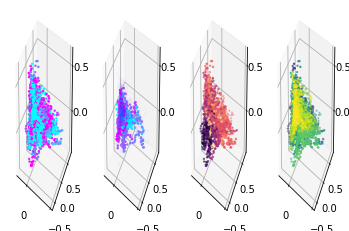

In [15]:

f,ax = plot_pca(S,VRDat,pcnt,plot_err=True)

In [23]:
sum(pcnt)

13383.0

In [24]:
pcnt.shape

(23163,)